## *<u>EDA In Depth*</u>

#### *On this chapter ,we will use R-Programming Language in order to conduct descreptive and inferential analysis to analys the data as much as we can to help descion making*

---
---

#### *A. Install needed libraries*

In [28]:
library(tidyverse)
library(janitor)
library(ggplot2)
library(patchwork)
library(mosaic)
library(skimr)
library(GGally)
library(dlookr)
library(rstatix)
library(ggstatsplot)
library(effectsize)
library(FSA)
library(ggpubr)
library(gmodels)
library(ISLR)
library(repr)
options(repr.plot.width=25, repr.plot.height=7);

---
---

#### *B. Data Set*

In [3]:
df<- read.csv("data_set_for_stats.csv")

In [4]:
df  %>% head()

,datesold,postcode,price,propertyType,bedrooms
,<chr>,<int>,<int>,<chr>,<int>
1,2007-02-07,2607,525000,house,4
2,2007-02-27,2906,290000,house,3
3,2007-03-07,2905,328000,house,3
4,2007-03-09,2905,380000,house,4
5,2007-03-21,2906,310000,house,3
6,2007-04-04,2905,465000,house,4


---

##### *B.1.  Na Values*

In [5]:
df  %>% is.na() %>% sum()

[1] 0

---

##### *B.2.  data types*

In [6]:
df %>% glimpse()

Rows: 29,580
Columns: 5
$ datesold     <chr> "2007-02-07", "2007-02-27", "2007-03-07", "2007-03-09", "…
$ postcode     <int> 2607, 2906, 2905, 2905, 2906, 2905, 2607, 2606, 2902, 290…
$ price        <int> 525000, 290000, 328000, 380000, 310000, 465000, 399000, 1…
$ propertyType <chr> "house", "house", "house", "house", "house", "house", "ho…
$ bedrooms     <int> 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 5, 3, 5, 4, …


---

##### *B.3.  Removing postcode Variables,converting (bedrooms,propertyType) to factors,and converting (datesold) to date factor*

In [7]:
df <- df %>% select(-postcode) 
df$bedrooms<-as.factor(df$bedrooms)
df$propertyType<-as.factor(df$propertyType)
df$datesold<- as.Date.factor(df$datesold)

* *Confirm our changings*

In [8]:
df %>% glimpse()

Rows: 29,580
Columns: 4
$ datesold     <date> 2007-02-07, 2007-02-27, 2007-03-07, 2007-03-09, 2007-03-…
$ price        <int> 525000, 290000, 328000, 380000, 310000, 465000, 399000, 1…
$ propertyType <fct> house, house, house, house, house, house, house, house, h…
$ bedrooms     <fct> 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 5, 3, 5, 4, …


---
---

#### *C. Analysis*

##### *C.1. Quick Data Summary*

In [9]:
df  %>% summary()

    datesold              price         propertyType  bedrooms 
 Min.   :2007-02-07   Min.   :  56500   house:24552   0:   30  
 1st Qu.:2013-02-05   1st Qu.: 440000   unit : 5028   1: 1627  
 Median :2015-09-30   Median : 550000                 2: 3598  
 Mean   :2015-02-21   Mean   : 609736                 3:11933  
 3rd Qu.:2017-07-26   3rd Qu.: 705000                 4:10442  
 Max.   :2019-07-27   Max.   :8000000                 5: 1950  

In [10]:
my_thems=theme(text = element_text(size = 30),
      plot.subtitle = element_text(size = 30),
      legend.title = element_text(size = 30),
      legend.text = element_text(size = 30),
      axis.text.x = element_text(size = 30)
      )

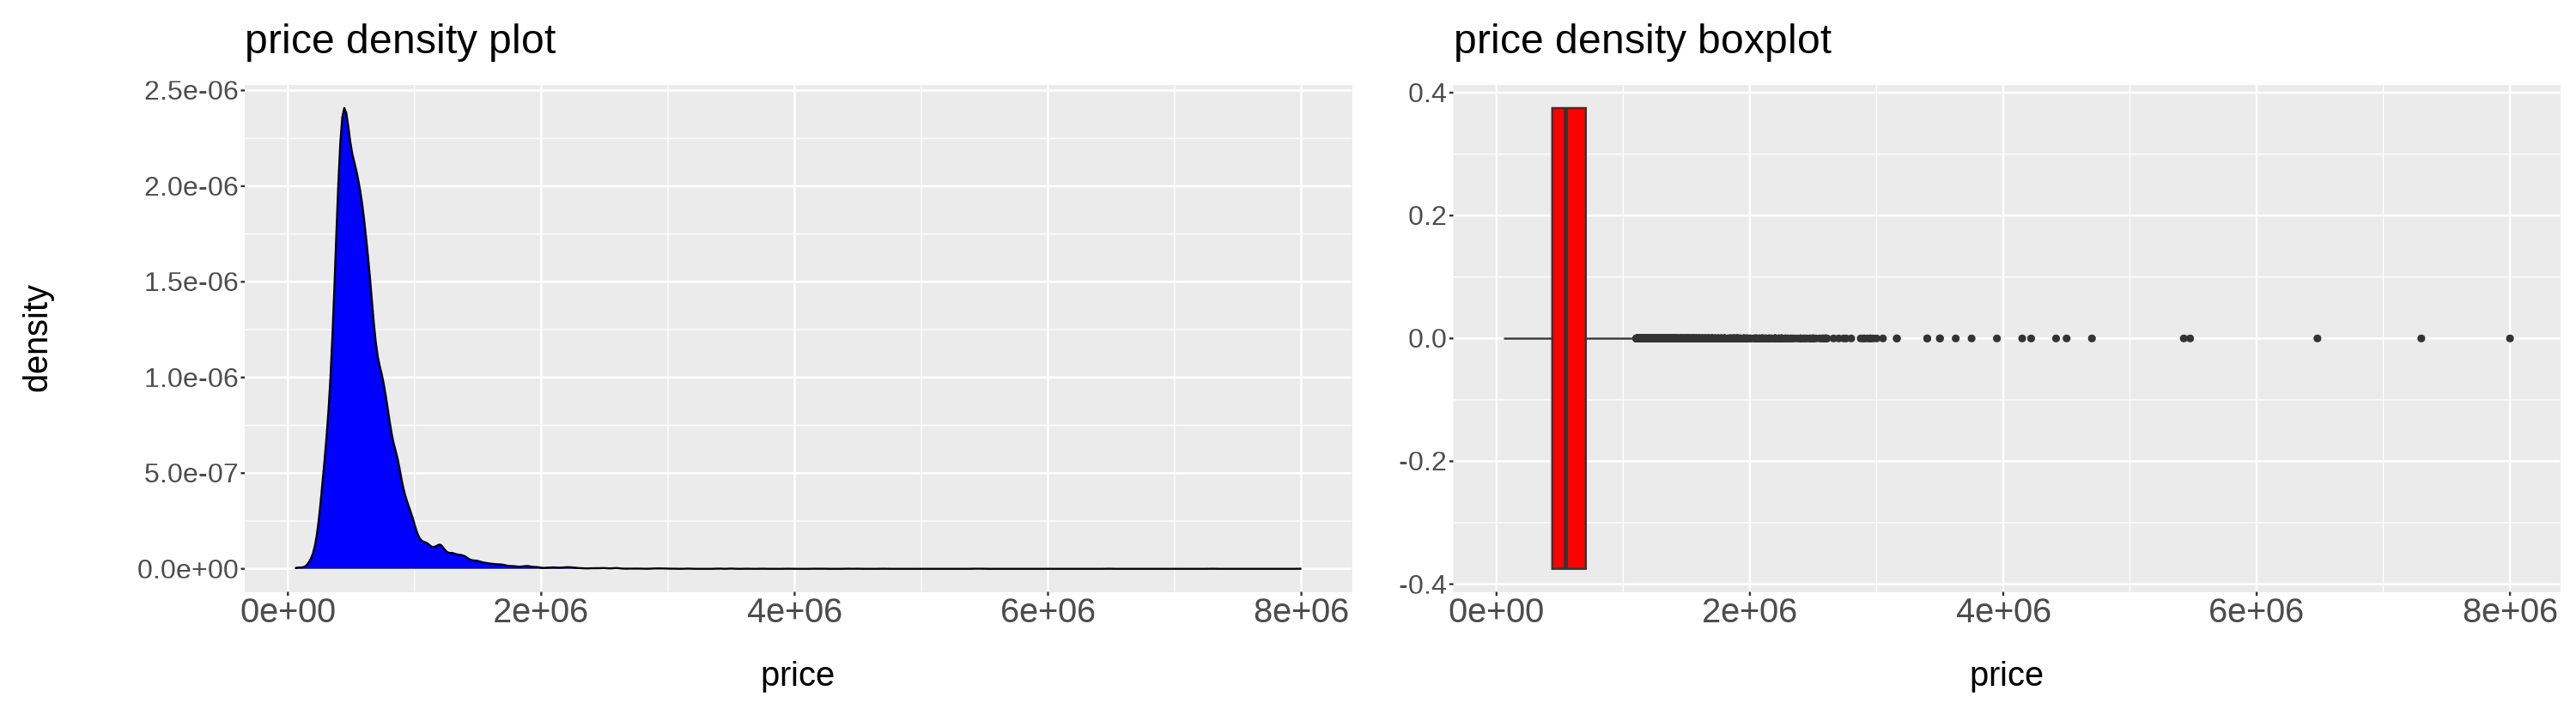

In [11]:
df %>%  ggplot(aes(x=price))+geom_density(fill="blue")+ggtitle("price density plot")+my_thems+
df %>%  ggplot(aes(x=price))+geom_boxplot(fill="red")+ggtitle("price density boxplot")+my_thems


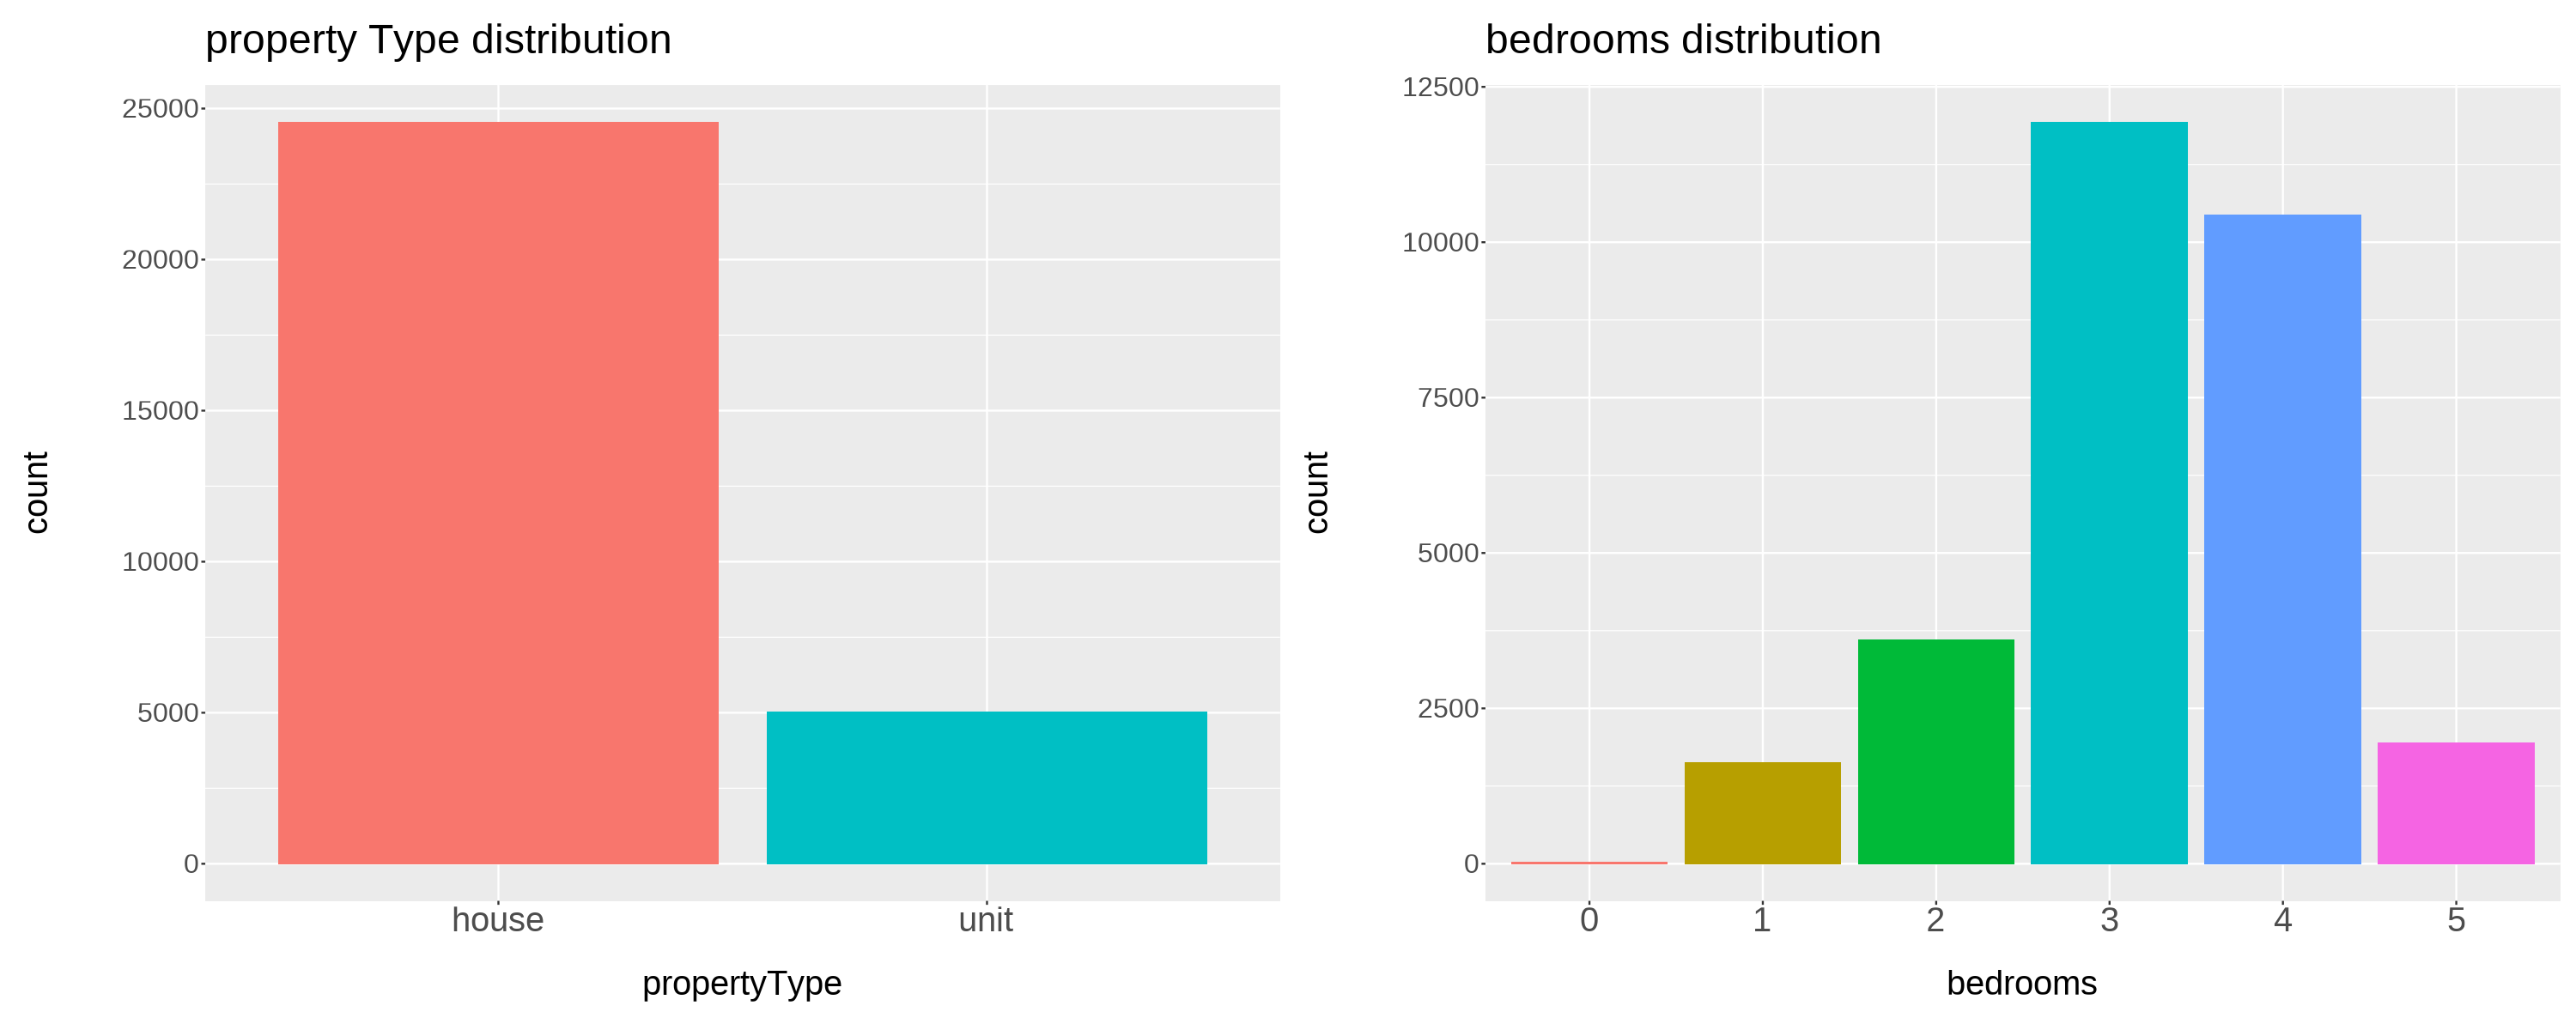

In [119]:
df  %>% ggplot(aes(x = propertyType,fill=propertyType))+geom_bar(show.legend = FALSE)+ggtitle("property Type distribution")+my_thems+
df  %>% ggplot(aes(x = bedrooms,fill=bedrooms))+geom_bar(show.legend = FALSE)+ggtitle("bedrooms distribution")+my_thems

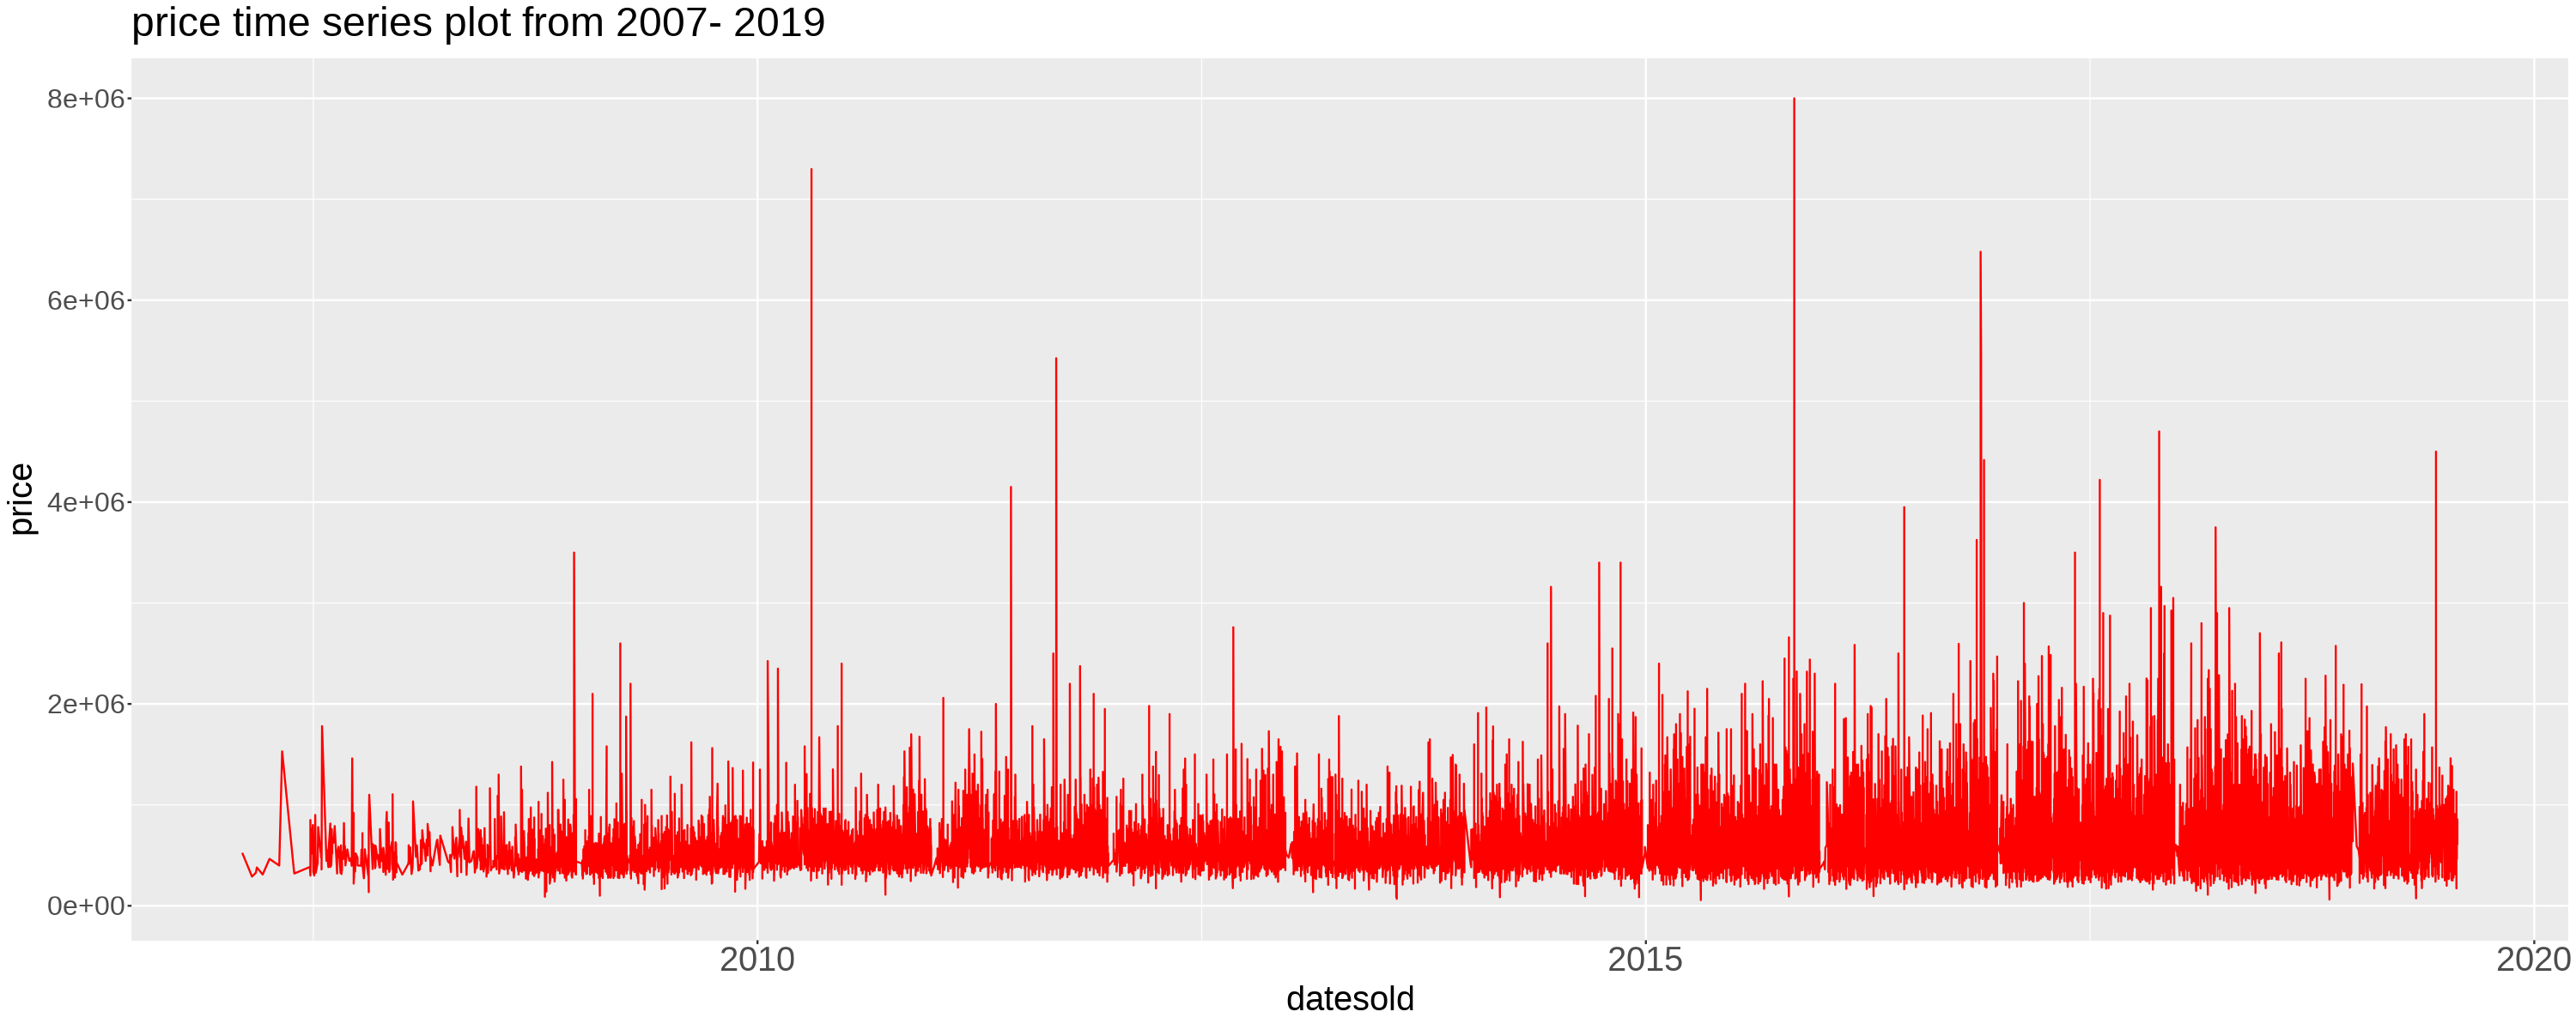

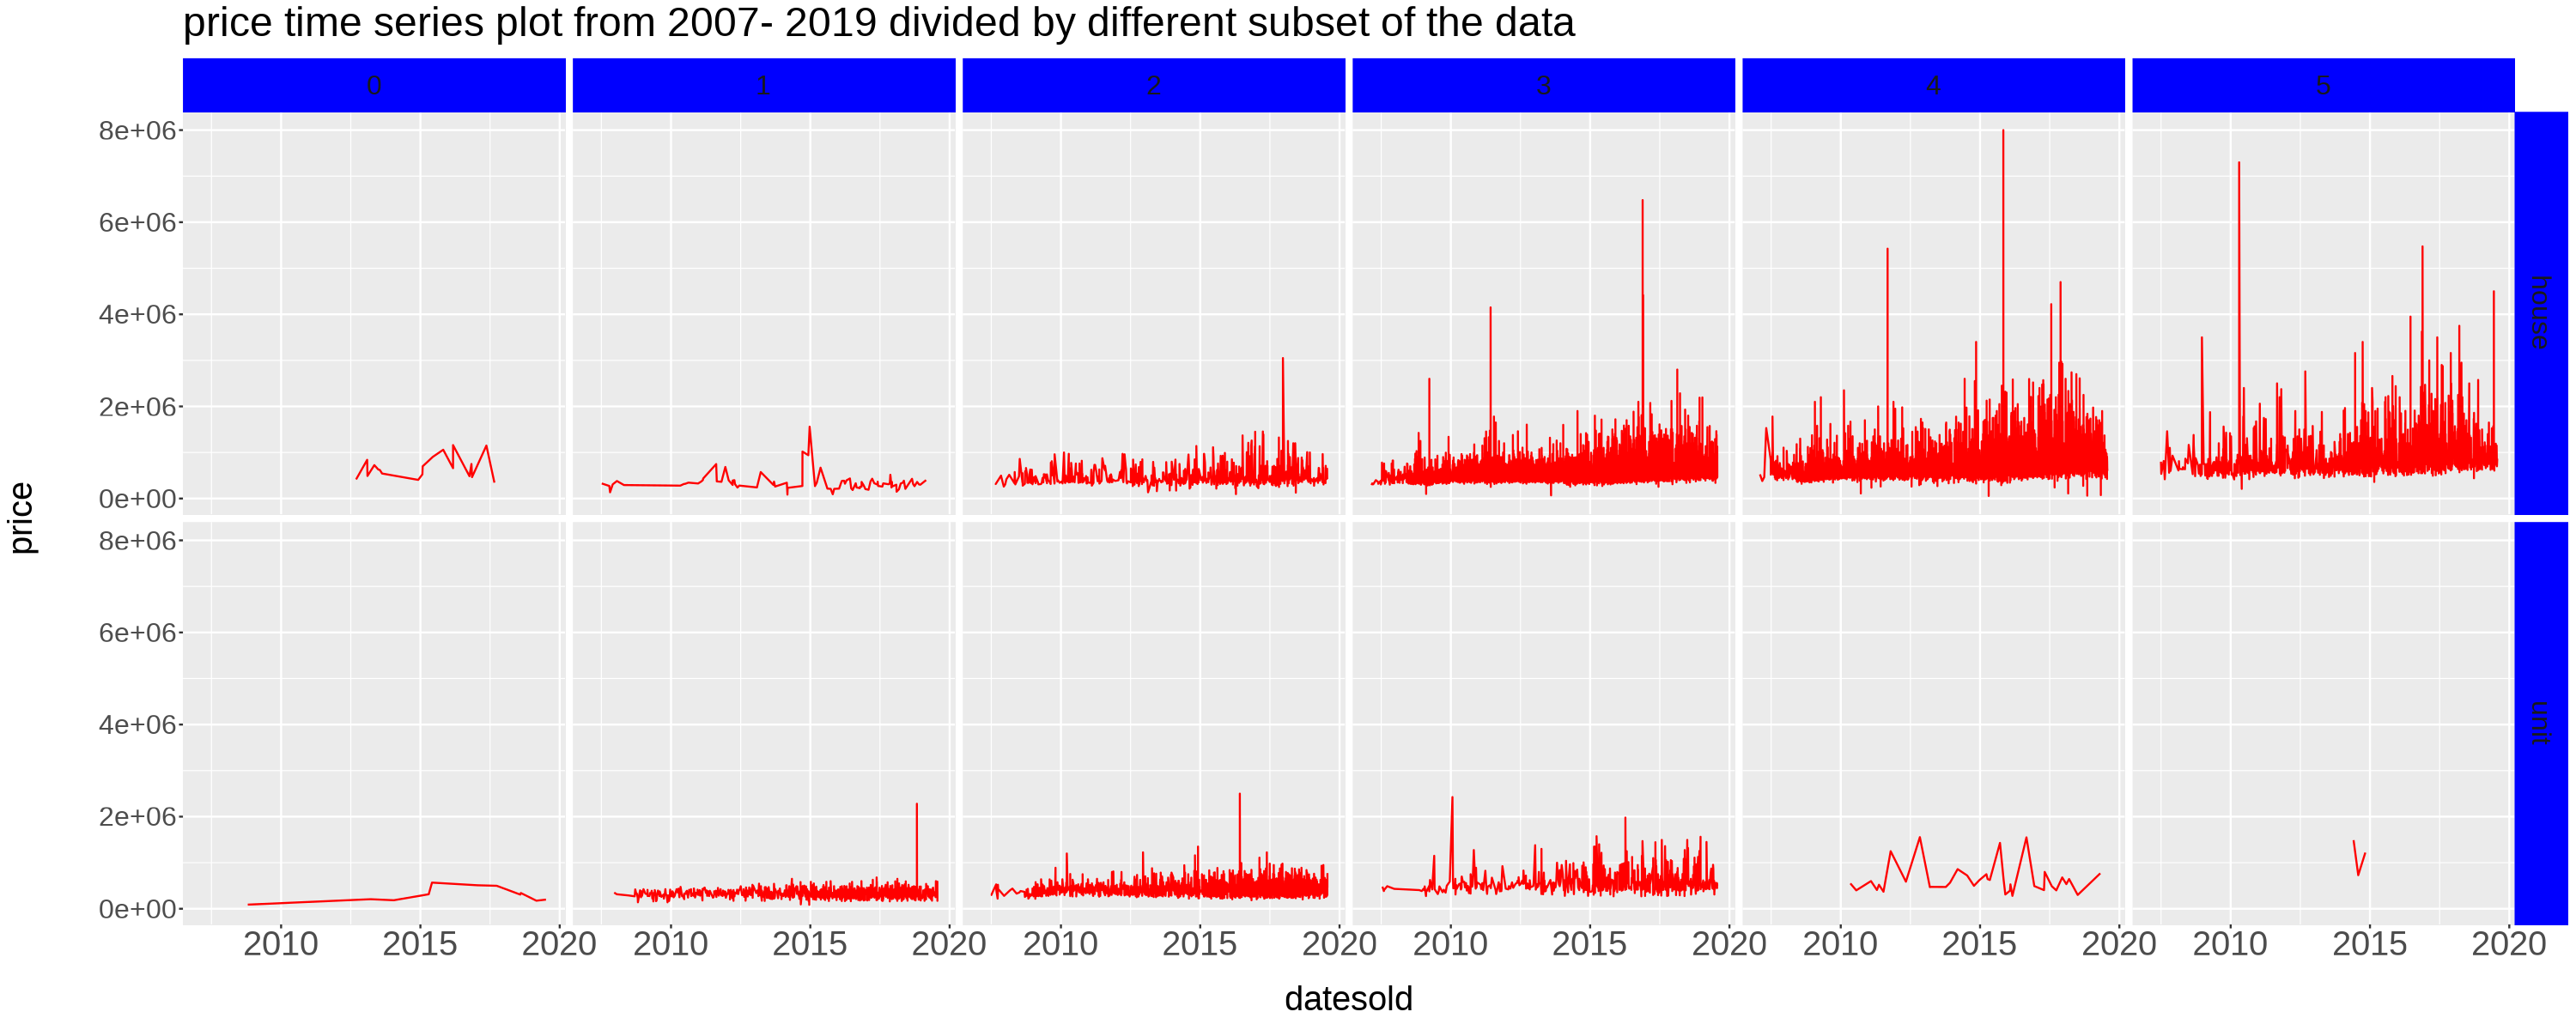

In [121]:
df %>% ggplot(aes(x=datesold,y = price))+geom_line(color="red")+ggtitle("price time series plot from 2007- 2019")+my_thems
df %>% ggplot(aes(x=datesold,y = price))+geom_line(color="red")+facet_grid(propertyType~bedrooms)+theme( strip.background = element_rect( fill="blue" ))+
ggtitle("price time series plot from 2007- 2019 divided by different subset of the data")+my_thems

---

##### *C.2. Interential Anaysis*

##### *normality check :*<br>
##### *normality Test: - A formal statistical test for normality - The null hypothesis states that the data follows a normal distribution shape*


In [89]:
df %>% select(price)  %>%  normality()

vars,statistic,p_value,sample
<chr>,<dbl>,<dbl>,<dbl>
price,0.7838285,4.569874e-63,5000


> #### *as the pvalue is less than 0.05 ---> we can reject the null hypothesis that states the data follows a normal distribution shape, and accept the alternative hypothesis*

---

##### *C.2.1 Numeric Analysis*

* *Mann-Whitney U Test -for features that have 2 categories :*<br>*equivelent to wilcox.test() wilcox rank sum test with continuity correction,better than wilcox sighned rank exct test(that used when variables are paired)*

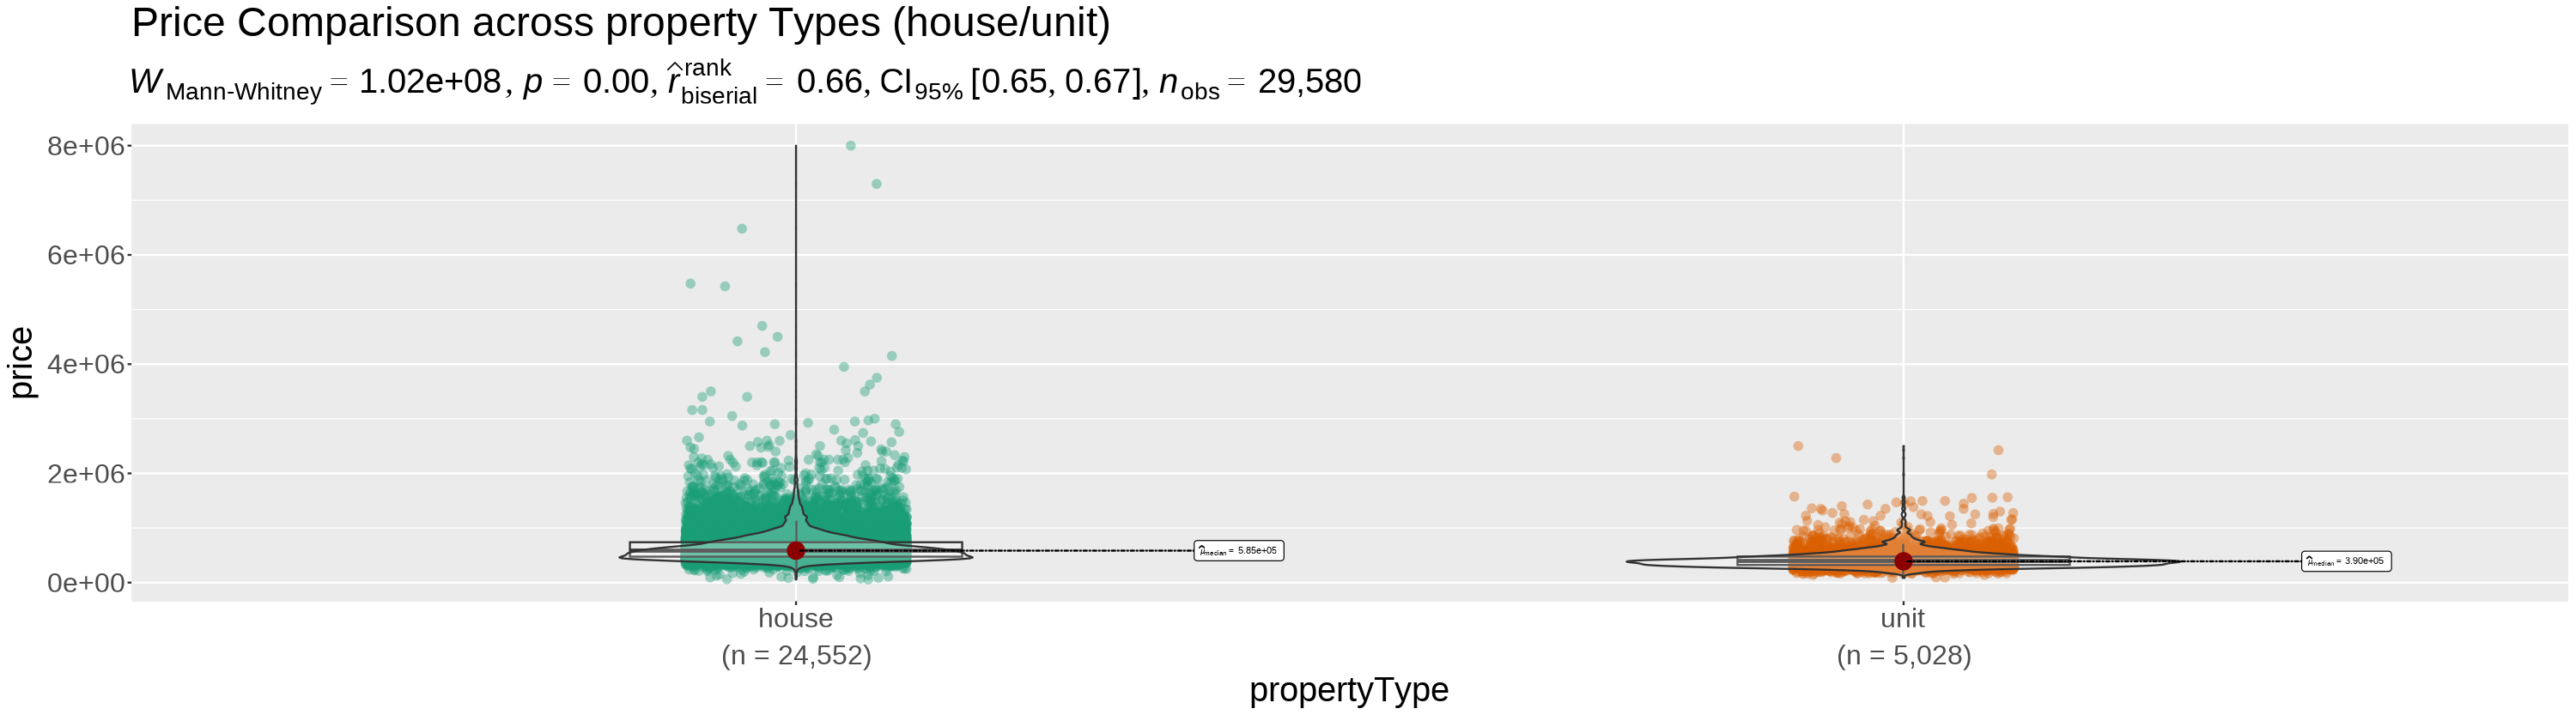

In [90]:
options(repr.plot.width=25, repr.plot.height=7);
Price_Comparison_across_property_Types <-df %>% 
ggbetweenstats(x=propertyType,y=price,type = "nonparamertic",ggtheme = ggplot2::theme_gray(),
title = "Price Comparison across property Types (house/unit)",
ggsignif.args = list(textsize = 3, tip_length = 0.01, na.rm = TRUE))+

theme(text = element_text(size = 30),plot.subtitle = element_text(size = 30),legend.text = element_text(size = 30) )

Price_Comparison_across_property_Types

> *From the above graph we can get that the pvalue is 0.00 --> less than 0.05 --> there is difference in the data distribution between house,and unit properity types with confidence intenrval between [.65,.67]*

> *this difference can be determined if it is large or small by interpreting the rank biserial value which is 0.66*

In [16]:
paste("The difference in the data distribution between Propertiy Types with rank_biserial = -0.66 is",interpret_rank_biserial(0.66))

[1] "The difference in the data distribution between Propertiy Types with rank_biserial = -0.66 is very large"

---

* *kruskal wallis Test -for features that have more than 3 categories :*<br>*describe:<br> 1. whether at least on group is different from other groups<br>2. and between which groups this difference is*

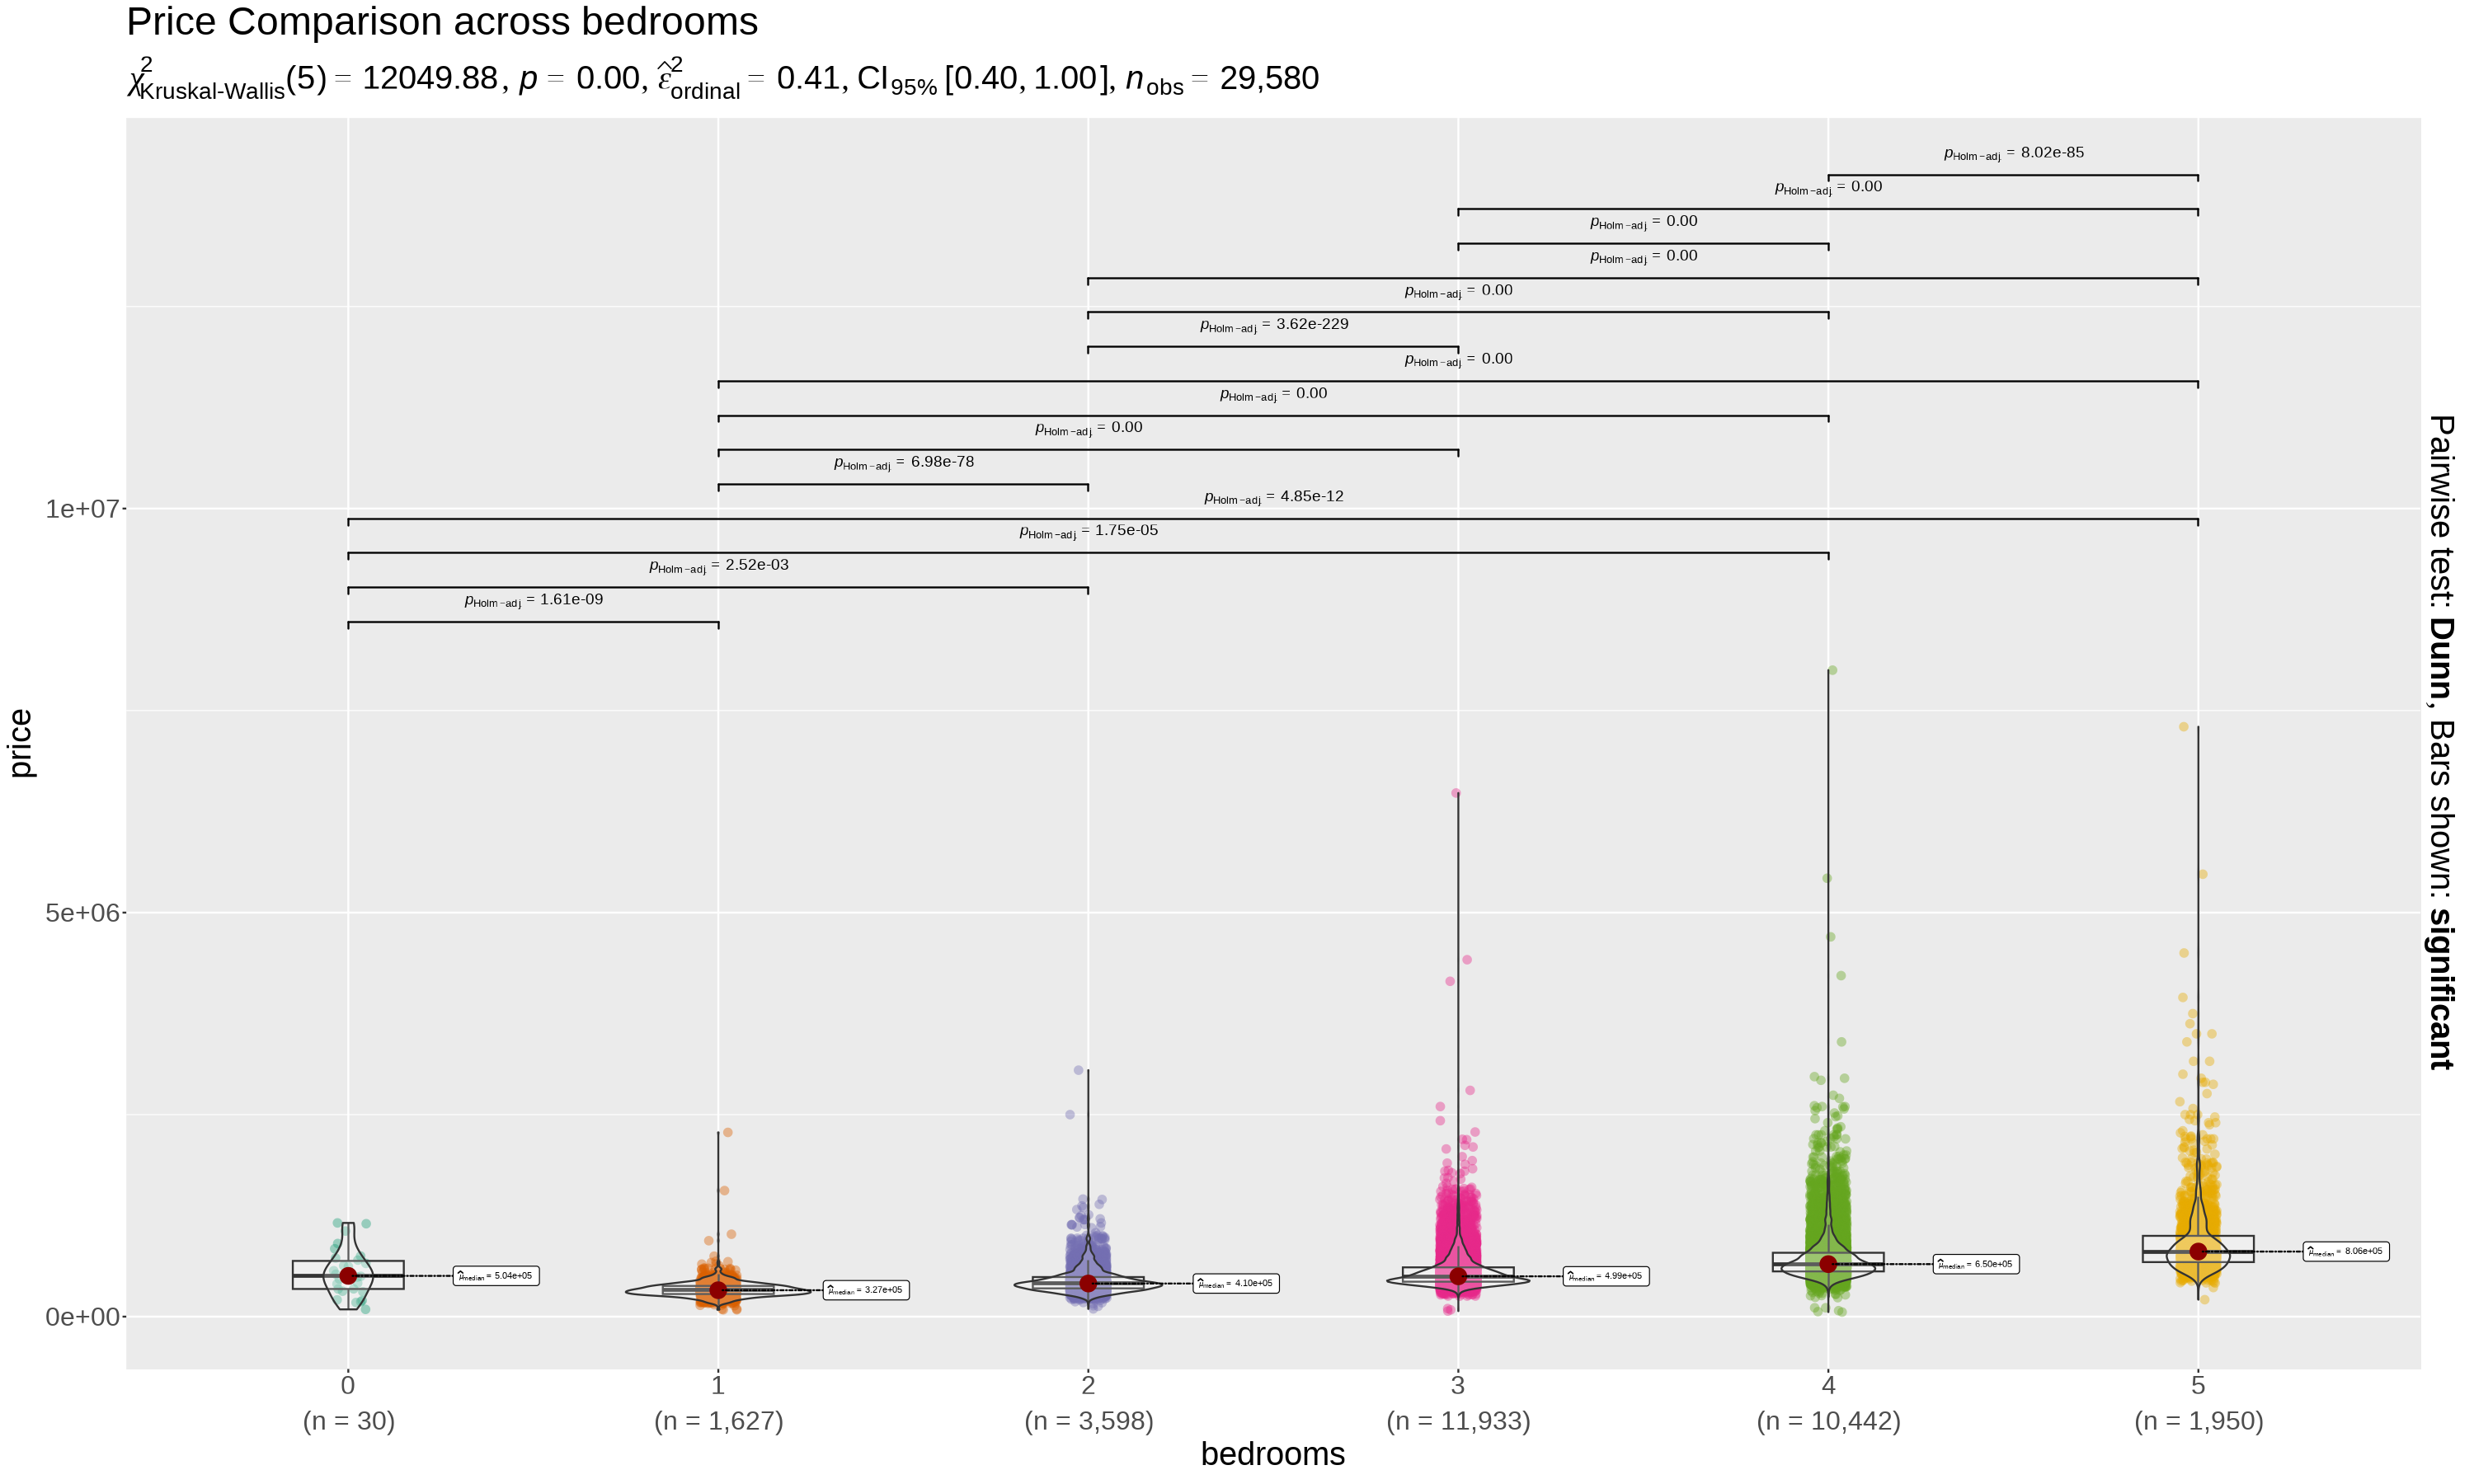

In [137]:
options(repr.plot.width=25, repr.plot.height=15);
Price_Comparison_across_bedrooms<-df %>% 
ggbetweenstats(x=bedrooms,y=price,type = "nonparamertic",ggtheme = ggplot2::theme_gray(),
title = "Price Comparison across bedrooms",
ggsignif.args = list(textsize = 5, tip_length = 0.01, na.rm = TRUE))+
theme(text = element_text(size = 30),
      plot.subtitle = element_text(size = 30),
      legend.title = element_text(size = 30),
      legend.text = element_text(size = 30)
                    )

Price_Comparison_across_bedrooms                    

> *From the above graph we can get that the pvalue is 0.00 --> less than 0.05 --> there is difference in the data distribution between bedrooms with confidence intenrval between [.40,1]*

> *this difference can be determined if it is large or small by interpreting the epsilon_squared value which is 0.41*

In [18]:
paste("The difference in the data distribution between Propertiy Types with rank_biserial = -0.41 is ",interpret_epsilon_squared(0.41))

[1] "The difference in the data distribution between Propertiy Types with rank_biserial = -0.41 is  large"

*Perform Dunn's Test with holm correction for p-values*

In [29]:
dunnTest(price ~ bedrooms,data=df, method="holm")

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Holm method.




   Comparison           Z       P.unadj         P.adj
1       0 - 1   6.2532710  4.019437e-10  1.607775e-09
2       0 - 2   3.2246371  1.261325e-03  2.522649e-03
3       1 - 2 -18.7770577  1.163514e-78  6.981085e-78
4       0 - 3  -0.1353723  8.923175e-01  8.923175e-01
5       1 - 3 -44.5330056  0.000000e+00  0.000000e+00
6       2 - 3 -32.3845603 4.527976e-230 3.622381e-229
7       0 - 4  -4.5323069  5.834301e-06  1.750290e-05
8       1 - 4 -74.3186748  0.000000e+00  0.000000e+00
9       2 - 4 -73.4484829  0.000000e+00  0.000000e+00
10      3 - 4 -59.9929036  0.000000e+00  0.000000e+00
11      0 - 5  -7.1345697  9.709041e-13  4.854521e-12
12      1 - 5 -73.4043100  0.000000e+00  0.000000e+00
13      2 - 5 -67.7003098  0.000000e+00  0.000000e+00
14      3 - 5 -52.7238080  0.000000e+00  0.000000e+00
15      4 - 5 -19.6152541  1.145630e-85  8.019412e-85

---

##### *C.2.2 Categorical Features Analysis*

* *We have two categorical fetaures : bedrooms and propertyType*

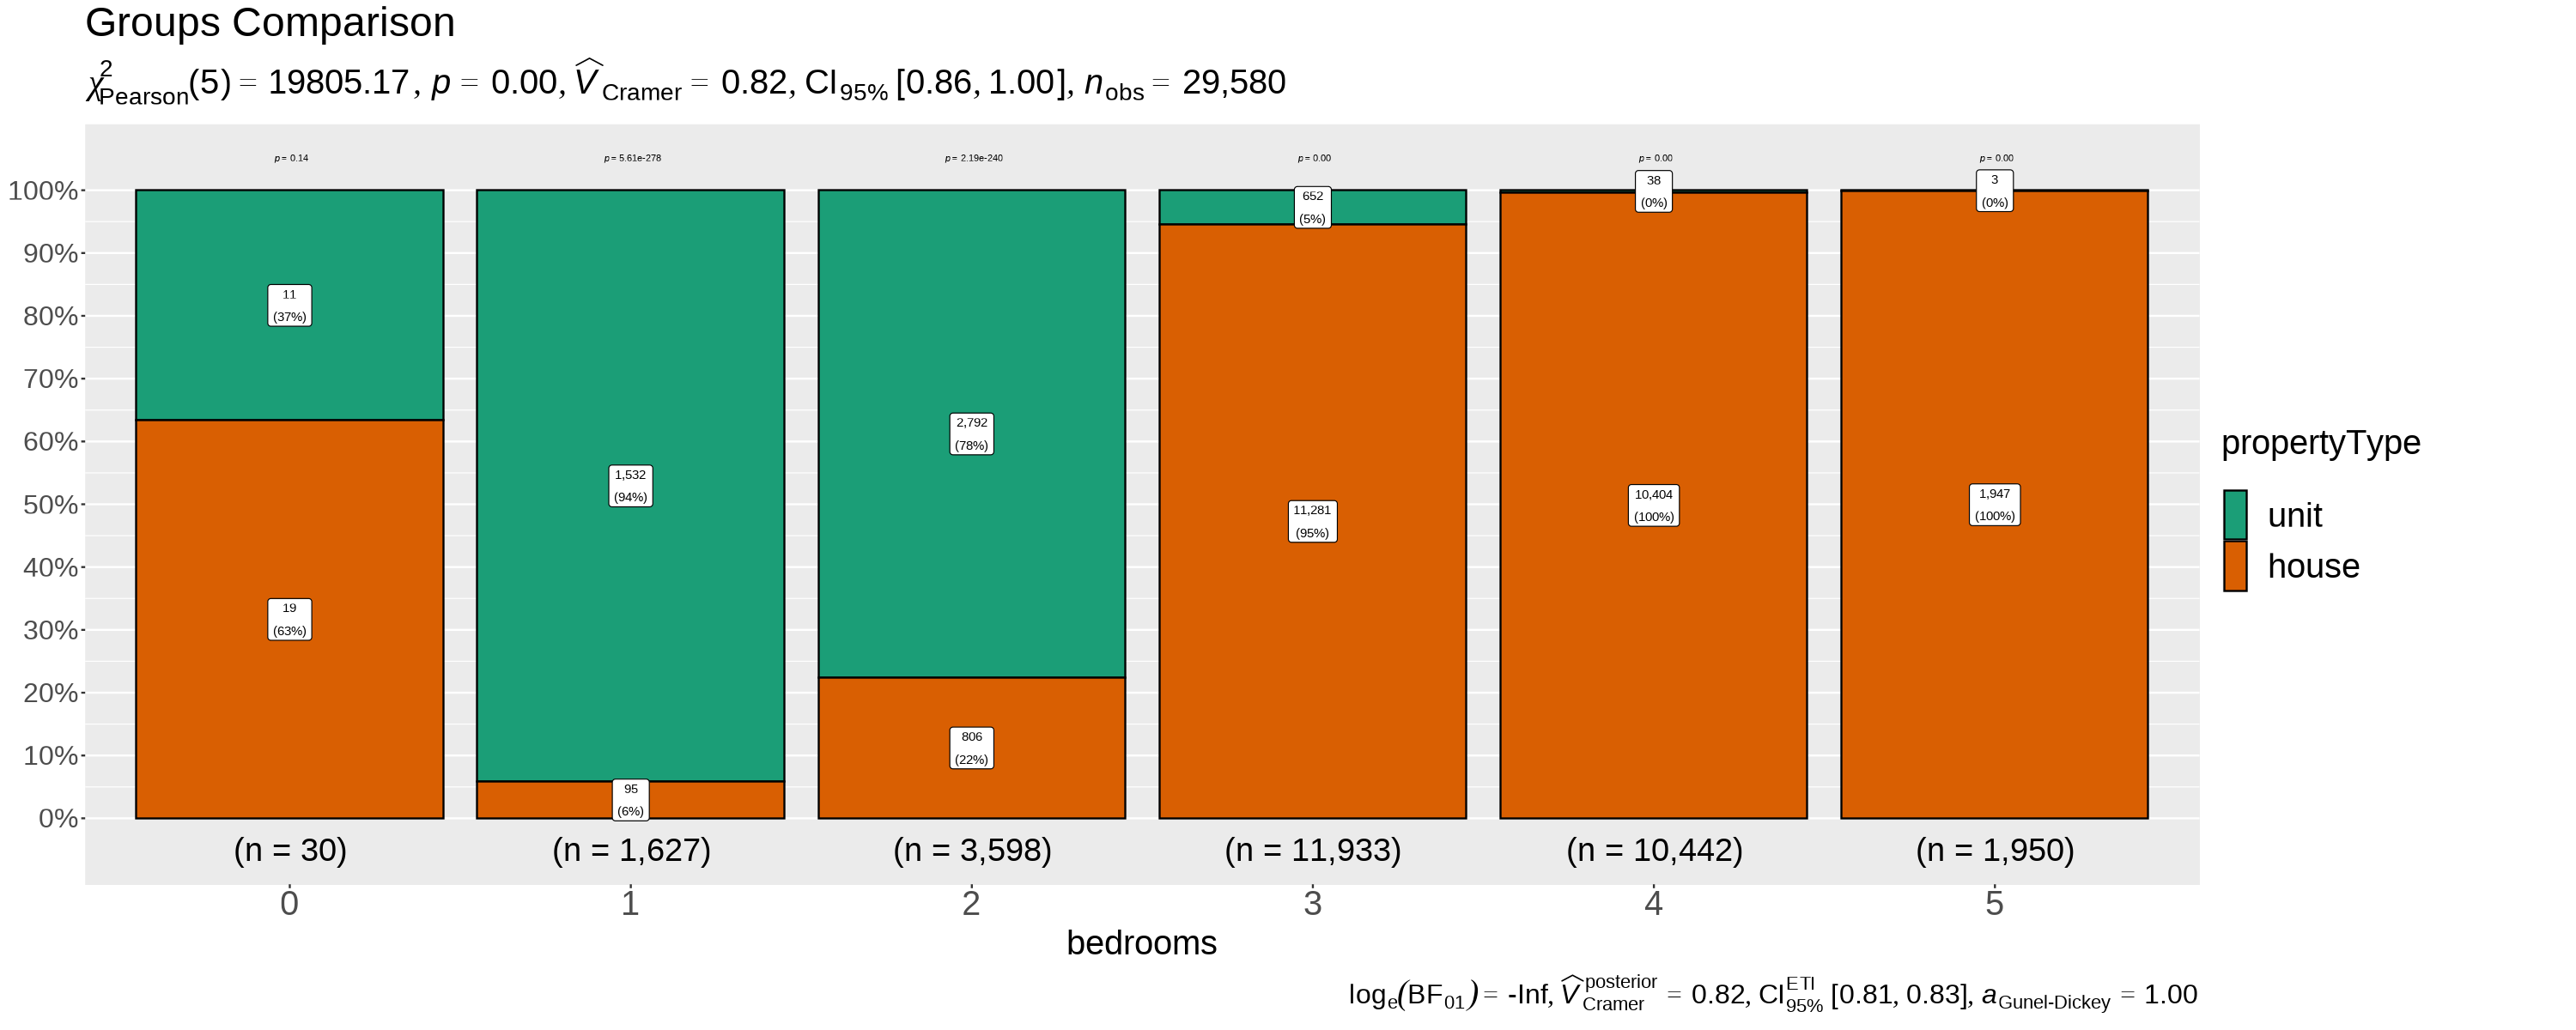

In [134]:
options(repr.plot.width=25, repr.plot.height=10);
Groups_Comparison<-df %>% ggbarstats(x=propertyType,y = bedrooms,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),title ="Groups Comparison")+

theme(text = element_text(size = 30),
      plot.subtitle = element_text(size = 30),
      legend.title = element_text(size = 30),
      legend.text = element_text(size = 30),
      axis.text.x = element_text(size = 30)
            )

Groups_Comparison

In [30]:
cat(paste('The difference in the data distribution between propertyType and bedrooms is',interpret_cramers_v(.82),"\n",'and the bayes factor indicate there is a',interpret_bf(0),'alternative hypothesis'))
     

The difference in the data distribution between propertyType and bedrooms is very large 
 and the bayes factor indicate there is a extreme evidence against alternative hypothesis

*POST HOC TEST*

In [31]:
table_data <- table(df$bedrooms, df$propertyType)
pairwise_prop_test(table_data)

Warning message in prop.test(x[c(i, j)], n[c(i, j)], ...):
"Chi-squared approximation may be incorrect"
Warning message in prop.test(x[c(i, j)], n[c(i, j)], ...):
"Chi-squared approximation may be incorrect"
Warning message in prop.test(x[c(i, j)], n[c(i, j)], ...):
"Chi-squared approximation may be incorrect"
Warning message in prop.test(x[c(i, j)], n[c(i, j)], ...):
"Chi-squared approximation may be incorrect"


,group1,group2,p,p.adj,p.adj.signif
,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,0,1,5.46e-33,2.73e-32,****
2,0,2,3.26e-07,6.52e-07,****
3,1,2,1.66e-48,9.98e-48,****
4,0,3,1.66e-12,4.97e-12,****
5,1,3,0.00e+00,0.00e+00,****
6,2,3,0.00e+00,0.00e+00,****
7,0,4,1.52e-169,1.36e-168,****
8,1,4,0.00e+00,0.00e+00,****
9,2,4,0.00e+00,0.00e+00,****


> *From the above graph and table, we can get that the p.adj values between all groups <u>(except between group1==4 and group2==5)</u> is less than 0.05 --> there is significant difference (association)in the data distribution between groups*

> *the p.adj value between group1==4 and group2==5 is more than 0.05 --> the difference in the data distribution between these two groups are not significant*

---